# Machine Learning Foundations: 
## Project for Supervised Machine Learning: Regression course

### By Zahra Adahman

### Part of IBM Machine Learning certificate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

### 1. Import and inspect data

In [2]:
CarEmission = pd.read_csv('FuelConsumption.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
CarEmission.head(n=5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
CarEmission.shape

(1067, 13)

In [6]:
#describe data
CarEmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
CarEmission.columns.values 

array(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE',
       'CYLINDERS', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'], dtype=object)

In [8]:
CarEmission.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### 2. Chose variables and visualize data between the engine size and amount of C02 Emissions variables

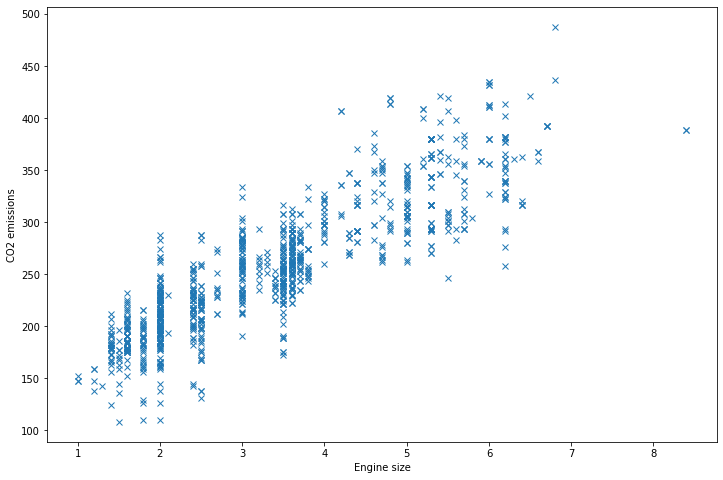

In [9]:
# Plotfigure for variables C02 emissions and enginesize

# Extract the X- and Y- data from the dataframe 
X_data = CarEmission['ENGINESIZE']
Y_data = CarEmission['CO2EMISSIONS']

plt.figure(figsize=(12,8))
plt.plot(X_data, Y_data, marker='x', ls='', label='data', alpha=1)
ax = plt.gca()
ax.set(xlabel='Engine size', ylabel='CO2 emissions');

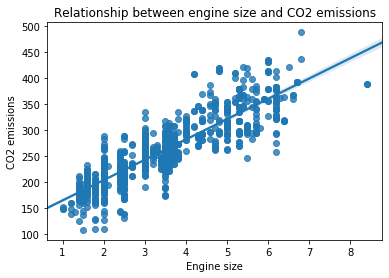

In [10]:
import seaborn as sns
axlin=sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=CarEmission);
axlin.set(xlabel='Engine size', ylabel='CO2 emissions');
axlin.set_title('Relationship between engine size and CO2 emissions');

In [46]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ("r-squared:", r_value**2)
print ("p value:", p_value)
print ("std err:", std_err)

r-squared: 0.7641458597854809
p value: 0.0
std err: 0.6660631152468043


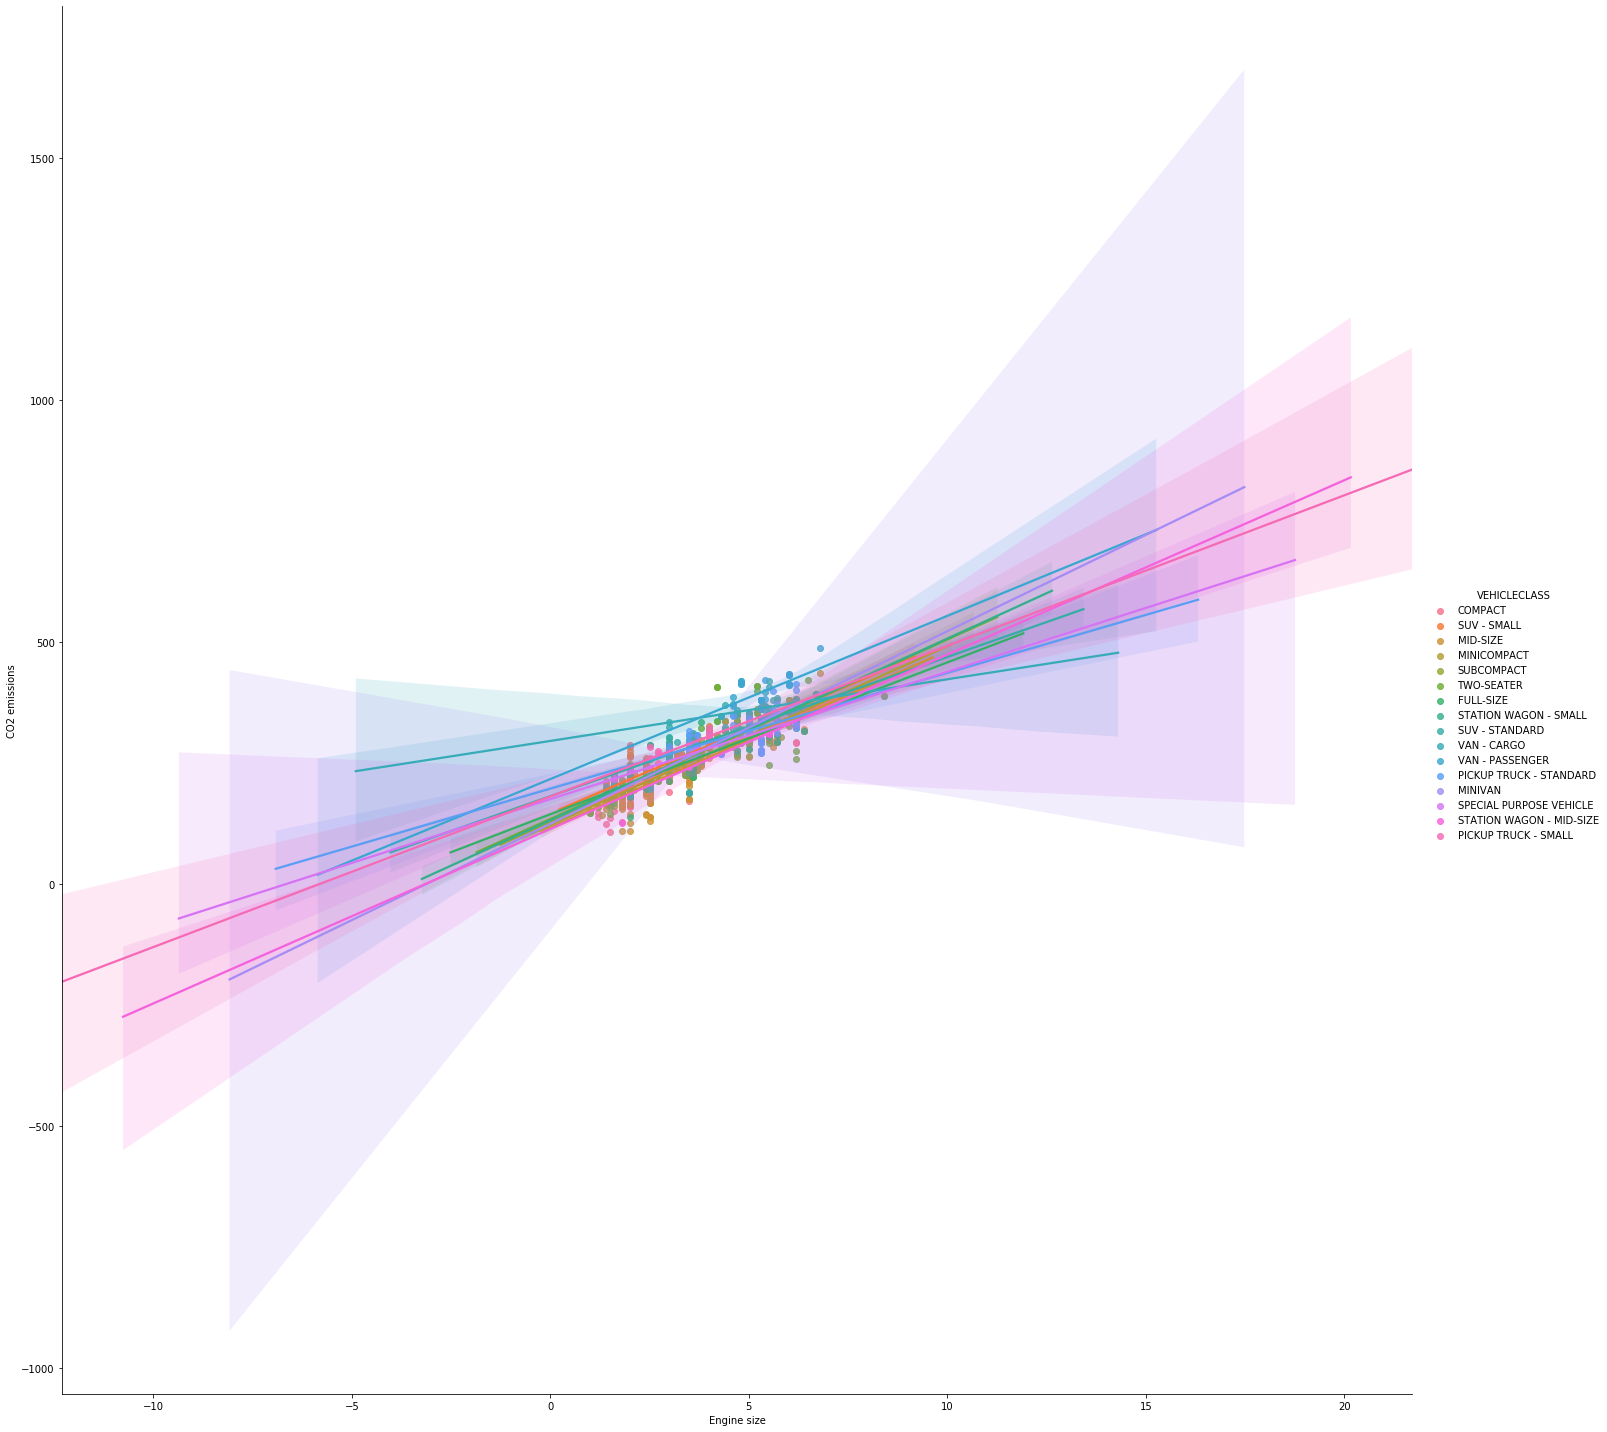

In [11]:
import seaborn as sns
axlin2=sns.lmplot(x="ENGINESIZE", y="CO2EMISSIONS", hue= 'VEHICLECLASS', height=20, data=CarEmission);
axlin2.set(xlabel='Engine size', ylabel='CO2 emissions');
#axlin2.set_title('Relationship between engine size and CO2 emissions');

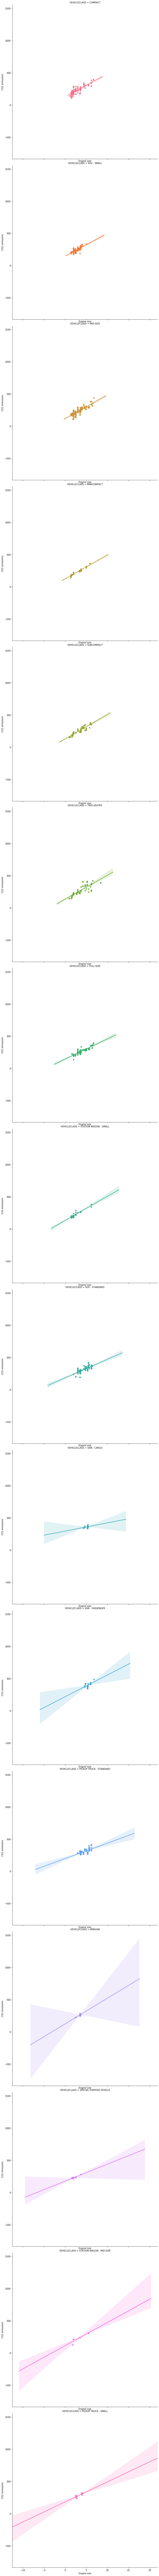

In [12]:
axlin3=sns.lmplot(x="ENGINESIZE", y="CO2EMISSIONS", hue= 'VEHICLECLASS',  row= 'VEHICLECLASS', height=10, data=CarEmission);
axlin3.set(xlabel='Engine size', ylabel='CO2 emissions');


In [13]:
x = CarEmission.iloc[:, 4].values #ENGINESIZE
y = CarEmission.iloc[:, 12].values #CO2EMISSIONS
# Here is the trick
x = x.reshape(-1,1)

#X_data= X_data.reshape(-1, 1)
#Y_data= Y_data.reshape(-1, 1)

### 3. Fit a basic linear regression model on the training data
#### Data standardization using standardscaler

In [14]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_ss = s.fit_transform(x)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)
print(lr.coef_)

[39.12519979]


#### a. Fit, and transform using `StandardScaler`

In [16]:
s = StandardScaler()
X_ss = s.fit_transform(x)

lr2 = LinearRegression()
lr2.fit(X_ss, y)
print(lr2.coef_) # coefficients  now "on the same scale"

[55.37121136]


#### b. Split into train and test sets 

In [17]:
from sklearn.model_selection import train_test_split

x = CarEmission.iloc[:, 4].values #ENGINESIZE
y = CarEmission.iloc[:, 12].values #CO2EMISSIONS
# Here is the trick
x = x.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(x_train, y_train)
y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(x_train, y_train)
y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no encoding'))
error_df = pd.concat(error_df, axis=1)
error_df

,no encoding
train,965.004034
test,904.109398


#### c. Plot Predictions vs truths 

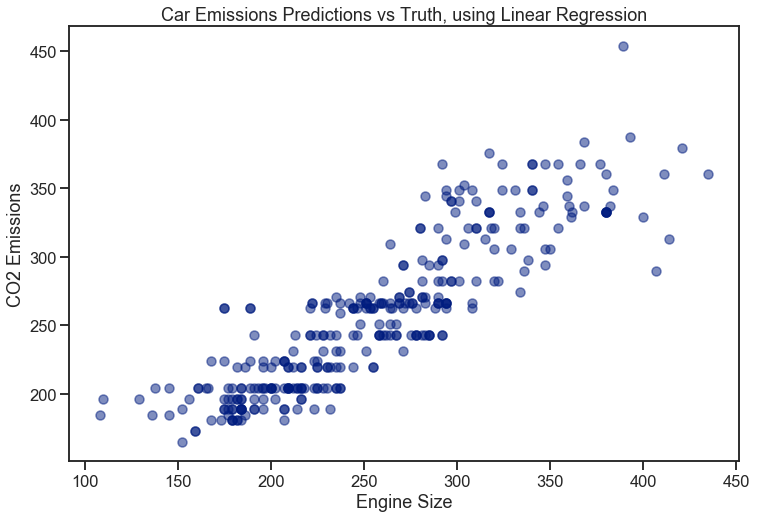

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

plt.figure(figsize=(12,8))
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Engine Size', 
       ylabel='CO2 Emissions',
       title='Car Emissions Predictions vs Truth, using Linear Regression');

### Lasso with and without scaling

In [21]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False,)
x_pf = pf.fit_transform(x)

#including bias by default
x_pf_ss = s.fit_transform(x_pf)

In [22]:
las = Lasso()
las.fit(x_pf_ss, y)
las.coef_ 

array([54.37121136,  0.        ])

In [23]:
#alpha of 0.1
las01 = Lasso(alpha = 0.1)
las01.fit(x_pf_ss, y)
print('sum of coefficients:', abs(las01.coef_).sum() )
print('number of coefficients not equal to 0:', (las01.coef_!=0).sum())

sum of coefficients: 76.76410074896772
number of coefficients not equal to 0: 2


In [24]:
#alpha of 1
las1 = Lasso(alpha = 1)
las1.fit(x_pf_ss, y)
print('sum of coefficients:', abs(las01.coef_).sum() )
print('number of coefficients not equal to 0:', (las01.coef_!=0).sum())

sum of coefficients: 76.76410074896772
number of coefficients not equal to 0: 2


#### Calculate $R^2$ 

In [25]:
from sklearn.metrics import r2_score
r2_score(y,las.predict(x_pf_ss))

0.7638966252533124

In [26]:

# Decreasing regularization and ensuring convergence
las001 = Lasso(alpha = 0.001, max_iter=100000)

# Transforming training set to get standardized units
x_train_s = s.fit_transform(x_train)

# Fitting model to training set
las001.fit(x_train_s, y_train)

# Transforming test set using the parameters defined from training set
x_test_s = s.transform(x_test)

# Finding prediction on test set
y_pred = las001.predict(x_test_s)

# Calculating r2 score
print("r2 score for alpha = 0.001:", r2_score(y_pred, y_test))


# Part 2

# Using vanilla Linear Regression
lr = LinearRegression()

# Fitting model to training set
lr.fit(x_train_s, y_train)

# predicting on test set
y_pred_lr = lr.predict(x_test_s)

# Calculating r2 score
print("r2 score for Linear Regression:", r2_score(y_pred_lr, y_test))


# Part 3
print('Magnitude of Lasso coefficients:', abs(las001.coef_).sum())
print('Number of coeffients not equal to 0 for Lasso:', (las001.coef_!=0).sum())

print('Magnitude of Linear Regression coefficients:', abs(lr.coef_).sum())
print('Number of coeffients not equal to 0 for Linear Regression:', (lr.coef_!=0).sum)

r2 score for alpha = 0.001: 0.7045550800938665
r2 score for Linear Regression: 0.7045662440527289
Magnitude of Lasso coefficients: 55.103773898000654
Number of coeffients not equal to 0 for Lasso: 1
Magnitude of Linear Regression coefficients: 55.10477389800064
Number of coeffients not equal to 0 for Linear Regression: <built-in method sum of numpy.ndarray object at 0x00000277F253EF80>


### Ridge Regression

In [27]:
from sklearn.linear_model import Ridge

# Decreasing regularization and ensuring convergence
r = Ridge(alpha = 0.001)
x_train_s = s.fit_transform(x_train)
r.fit(x_train_s, y_train)
x_test_s = s.transform(x_test)
y_pred_r = r.predict(x_test_s)

# Calculating r2 score
r.coef_
### END SOLUTION

array([55.10470003])

In [28]:
print(np.sum(np.abs(r.coef_)))
print(np.sum(np.abs(las001.coef_)))

print(np.sum(r.coef_ != 0))
print(np.sum(las001.coef_ != 0))

55.104700031110525
55.103773898000654
1
1


In [29]:
y_pred_r = r.predict(x_test_s)
print("r2 score for ridge regression:", r2_score(y_pred_r, y_test))

y_pred_lr = lr.predict(x_test_s)
print("r2 score for Linear Regression:", r2_score(y_pred_lr, y_test))

r2 score for ridge regression: 0.7045654194494002
r2 score for Linear Regression: 0.7045662440527289


### Cross validation

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [31]:
x = CarEmission.iloc[:, 4].values #ENGINESIZE
y = CarEmission.iloc[:, 12].values #CO2EMISSIONS

kf = KFold(shuffle=True, random_state=72018, n_splits=3)

kf.split(x)


<generator object _BaseKFold.split at 0x00000277F25234C8>

In [32]:
for train_index, test_index in kf.split(x):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 2  3  5  6  7  8 10 11 12 13] 711
Test index: [ 0  1  4  9 16 17 23 30 32 33] 356

Train index: [ 0  1  3  4  5  7  8  9 10 11] 711
Test index: [ 2  6 12 15 19 24 25 26 27 29] 356

Train index: [ 0  1  2  4  6  9 12 15 16 17] 712
Test index: [ 3  5  7  8 10 11 13 14 18 20] 355



In [33]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [34]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X_ss, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [35]:
list(zip(alphas,scores))

[(1e-09, 0.7628082677633901),
 (1e-08, 0.7628082677628087),
 (1e-07, 0.762808267756996),
 (1e-06, 0.7628082676988672),
 (1e-05, 0.7628082671175571),
 (0.0001, 0.7628082613022301),
 (0.001, 0.7628082029262763),
 (0.01, 0.7628075968983671),
 (0.1, 0.7627993097821562),
 (1.0, 0.7624937549082359)]

In [36]:
Lasso(alpha=1e-6).fit(X_ss, y).coef_

array([55.37121036])

In [37]:
Lasso(alpha=1.0).fit(X_ss, y).coef_

array([54.37121136])

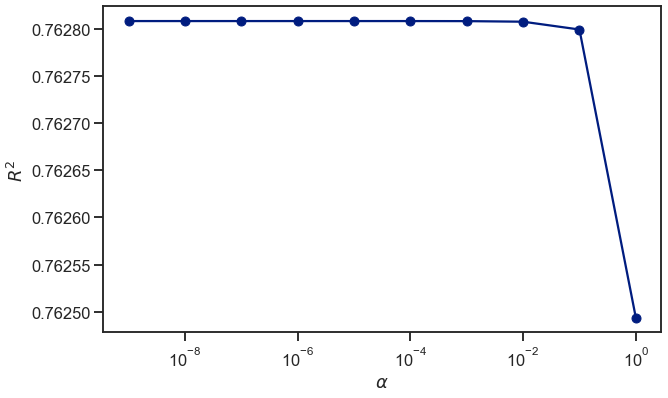

In [38]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

### When the alpha of $10e^-1$, the $R^2$  is just as good as an alpha of $10e^-9$

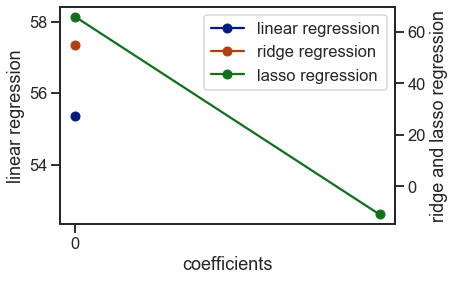

In [39]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr2.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(r.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(las01.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
#ax1.set_ylim(-2e14, 2e14)
#ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));